In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.datasets.utils import download_url
import tarfile
import os

## Downloading Dataset

In [2]:
dataset_url = 'http://files.fast.ai/data/cifar10.tgz'
download_url(dataset_url , '.')

Using downloaded and verified file: ./cifar10.tgz


## Unzipping

In [3]:
with tarfile.open('./cifar10.tgz' , 'r:gz') as tar:
    tar.extractall(path = '.')

In [4]:
os.listdir('./cifar10')

['train', 'test', 'labels.txt']

In [5]:
for folders,_,_ in os.walk('./cifar10'):
    print(folders)

./cifar10
./cifar10/train
./cifar10/train/horse
./cifar10/train/dog
./cifar10/train/deer
./cifar10/train/frog
./cifar10/train/cat
./cifar10/train/airplane
./cifar10/train/automobile
./cifar10/train/bird
./cifar10/train/ship
./cifar10/train/truck
./cifar10/test
./cifar10/test/horse
./cifar10/test/dog
./cifar10/test/deer
./cifar10/test/frog
./cifar10/test/cat
./cifar10/test/airplane
./cifar10/test/automobile
./cifar10/test/bird
./cifar10/test/ship
./cifar10/test/truck


## Converting .png to Tensor Dataset 

In [6]:
from torchvision.datasets import ImageFolder

In [7]:
dataset = ImageFolder('./cifar10/train', transform=ToTensor())

In [8]:
dataset

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./cifar10/train
    StandardTransform
Transform: ToTensor()

In [9]:
dataset[0]

(tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          ...,
          [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
          [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
          [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],
 
         [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
          [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
          [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
          ...,
          [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
          [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
          [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],
 
         [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
          [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
          [0.9686, 0.9686, 0.9765,  ...,

In [10]:
dataset[0][0].shape

torch.Size([3, 32, 32])

In [11]:
dataset[5999][1]

1

In [12]:
dataset.classes # lists out each of the folders

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
import matplotlib.pyplot as plt

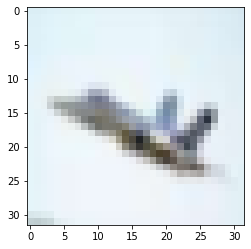

In [14]:
plt.imshow(dataset[0][0].permute(1,2,0))

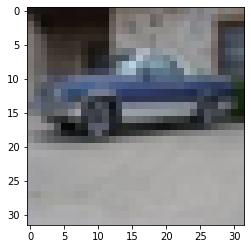

In [15]:
plt.imshow(dataset[5000][0].permute(1,2,0) , cmap = 'gray')

In [16]:
import numpy as np

## Converting to Batches

In [17]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [18]:
batch_size = 100
train_dl = DataLoader(dataset , batch_size , sampler = SubsetRandomSampler(np.random.permutation(len(dataset))))

In [19]:
for images,labels in train_dl:
    print(images)
    print(labels)
    break

tensor([[[[0.6745, 0.5137, 0.4627,  ..., 0.6157, 0.6078, 0.6157],
          [0.6275, 0.3529, 0.2588,  ..., 0.5765, 0.5529, 0.5686],
          [0.7020, 0.5059, 0.3176,  ..., 0.7294, 0.6902, 0.6980],
          ...,
          [0.4196, 0.3725, 0.2353,  ..., 0.5725, 0.4431, 0.4078],
          [0.4275, 0.3961, 0.3294,  ..., 0.0510, 0.1647, 0.4039],
          [0.4941, 0.4392, 0.3765,  ..., 0.1529, 0.3333, 0.4196]],

         [[0.5529, 0.4235, 0.4039,  ..., 0.5490, 0.5490, 0.5569],
          [0.4941, 0.2706, 0.2157,  ..., 0.4549, 0.4314, 0.4471],
          [0.5843, 0.4157, 0.2471,  ..., 0.5843, 0.5451, 0.5529],
          ...,
          [0.3333, 0.3020, 0.1765,  ..., 0.5294, 0.4078, 0.3647],
          [0.3373, 0.3137, 0.2549,  ..., 0.0000, 0.1098, 0.2745],
          [0.4078, 0.3490, 0.2863,  ..., 0.0784, 0.2431, 0.3059]],

         [[0.4431, 0.3333, 0.3255,  ..., 0.4706, 0.4745, 0.4784],
          [0.3922, 0.1804, 0.1333,  ..., 0.3412, 0.3255, 0.3412],
          [0.4745, 0.3294, 0.1765,  ..., 0

In [20]:
import torch.nn as nn
import torch.nn.functional as F

## Dummy Model

In [21]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8, kernel_size = 3 , stride = 1 , padding = 1 , padding_mode = 'zeros'),
    nn.ReLU(),
    nn.MaxPool2d(2, 2)
)

In [22]:
for images,labels in train_dl:
    print("Input Size : " , images.shape)
    output = simple_model(images)
    print('Output Size : ' , output.shape)
    break

Input Size :  torch.Size([100, 3, 32, 32])
Output Size :  torch.Size([100, 8, 16, 16])


Original Image : 


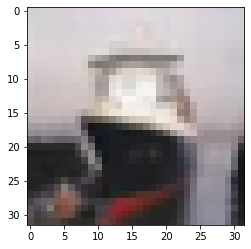

In [23]:
print('Original Image : ')
dropped_img = images[0,:,:,:]
plt.imshow(dropped_img.permute(1,2,0))

# Output image cannot be shown as it contains 8 channels exceeding the maximum amount of channel required by matplotlib (3)

## Model

In [24]:
class Model(nn.Module):
    def __init__(self):
        super(Model , self).__init__()
        self.conv1 = nn.Conv2d(3,16 ,3,1,1)
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(16,32 ,3,1,1)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.conv3 = nn.Conv2d(32,64,3,1,1)
        self.pool3 = nn.MaxPool2d(2,2)
        
        self.conv4 = nn.Conv2d(64,128,3,1,1)
        self.pool4 = nn.MaxPool2d(2,2)
        
        self.conv5  = nn.Conv2d(128,256,3,1,1)
        self.pool5 = nn.MaxPool2d(2,2)
        
        self.falt = nn.Flatten()
        
        self.layer1 = nn.Linear(256, 32)
        self.layer2 = nn.Linear(32, 10)
        
    def forward(self, batch):
        out = self.pool1(F.relu(self.conv1(batch)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.pool4(F.relu(self.conv4(out)))
        out = self.pool5(F.relu(self.conv5(out)))
    

        out = self.falt(out)

        out = self.layer1(out)
        out = F.relu(out)
        out = self.layer2(out)

        return out
    

In [25]:
model = Model()

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[[[-0.1229,  0.0873,  0.0072],
           [-0.0240, -0.0985,  0.0763],
           [-0.1705, -0.0842,  0.1686]],
 
          [[-0.0031,  0.0341, -0.0379],
           [-0.0997,  0.1070, -0.1015],
           [-0.0749,  0.1073, -0.1728]],
 
          [[ 0.1633, -0.0710,  0.0259],
           [ 0.1488,  0.1000,  0.1161],
           [ 0.1904,  0.0851, -0.0015]]],
 
 
         [[[ 0.0657, -0.0904,  0.1339],
           [ 0.1172, -0.1114,  0.0741],
           [-0.0843, -0.0813,  0.0403]],
 
          [[-0.1814, -0.0473, -0.1847],
           [-0.1348,  0.0258, -0.0986],
           [-0.0021, -0.1033,  0.1815]],
 
          [[ 0.1328,  0.0738, -0.0272],
           [ 0.1266, -0.1701,  0.0310],
           [ 0.1211, -0.1537,  0.0180]]],
 
 
         [[[-0.0555,  0.0342, -0.0531],
           [ 0.0333, -0.0653,  0.1282],
           [-0.0502, -0.0957, -0.0720]],
 
          [[ 0.1716,  0.0674,  0.1908],
           [ 0.0776,  0.1196, -0.1530],
           [ 0.0106,  0.0911, 

## Enabling Calculations On GPU

In [27]:
torch.cuda.is_available()

True

In [28]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')

In [29]:
device = get_default_device()
device

device(type='cuda', index=0)

In [30]:
model = Model().to(device)

## Pushing Data To GPU In Batches

In [31]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [32]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [33]:
train_dl = DeviceDataLoader(train_dl, device)

## Training On GPU

In [34]:
for image,label in train_dl:
    prediction = model(image)
    print('Initial Loss : ' , F.cross_entropy(prediction , label).item())
    print('Matrix of prediction : ' , F.softmax(prediction[0]))
    print('Its actual label : ' , label[0])
    break

Initial Loss :  2.3280251026153564
Matrix of prediction :  tensor([0.0970, 0.1177, 0.0822, 0.0857, 0.1014, 0.1054, 0.1058, 0.1129, 0.0957,
        0.0961], device='cuda:0', grad_fn=<SoftmaxBackward>)
Its actual label :  tensor(4, device='cuda:0')


/home/aryanshridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [35]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

In [ ]:
iteration = []
loss_set = []

for epoch in range(60):
    for train,labels in train_dl:
        
        prediction = model(train)
        loss = F.cross_entropy(prediction , labels)
        loss.backward()
        
        with torch.no_grad():
            optimizer.step()
            optimizer.zero_grad()
    
    iteration.append(epoch)
    loss_set.append(float("{:.2f}".format(loss)))
    
    print(f'Iteration {epoch} : Loss - {loss}')
        

Iteration 0 : Loss - 2.304567813873291
Iteration 1 : Loss - 2.3060920238494873
Iteration 2 : Loss - 2.301068067550659
Iteration 3 : Loss - 2.300461530685425
Iteration 4 : Loss - 2.3012375831604004
Iteration 5 : Loss - 2.299748420715332
Iteration 6 : Loss - 2.300309658050537
Iteration 7 : Loss - 2.296316623687744
Iteration 8 : Loss - 2.2857236862182617
Iteration 9 : Loss - 2.271054744720459
Iteration 10 : Loss - 2.142641305923462
Iteration 11 : Loss - 2.1054210662841797
Iteration 12 : Loss - 1.9902747869491577
Iteration 13 : Loss - 1.9578547477722168
Iteration 14 : Loss - 1.81535005569458
Iteration 15 : Loss - 1.9789786338806152
Iteration 16 : Loss - 1.8584260940551758
Iteration 17 : Loss - 1.7488995790481567
Iteration 18 : Loss - 1.6734040975570679
Iteration 19 : Loss - 1.700410008430481
Iteration 20 : Loss - 1.6508421897888184
Iteration 21 : Loss - 1.5336135625839233
Iteration 22 : Loss - 1.6383274793624878
Iteration 23 : Loss - 1.519485354423523
Iteration 24 : Loss - 1.59215855598449

In [ ]:
train.device

## Plot Between Loss And Iteration

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(iteration,loss_set)

## Accuracy on Test Set

In [ ]:
testset = ImageFolder('./cifar10/test', transform=ToTensor())

In [ ]:
testset[0]

In [ ]:
batch_size = 100
test_dl = DataLoader(testset , batch_size , sampler = SubsetRandomSampler(np.random.permutation(len(testset))))

In [ ]:
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
correct = 0
total = 0
for image,label in test_dl:
    pred = model(image)
    for i in range(len(pred)):
        _ , index = torch.max(F.softmax(pred[i]), dim = 0)
        if index.item() == label[i].item():
            correct += 1
        total += 1

In [ ]:
print(f'Accuracy is {round((correct/total)*100)}%')